In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df["Price"] = boston.target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
X = boston.data
y = boston.target

In [7]:
X.shape

(506, 13)

In [8]:
y.shape

(506,)

## Linear Regression


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
# cross_val_score will create 5 folds means 5 testsets means create 5models and gives 5test scores
scores_of_test_set = cross_val_score(lin_regressor, X, y, cv=5)
np.mean(scores_of_test_set)

0.35327592439588124

## Ridge Regression

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [12]:
ridge_regressor.best_params_

{'alpha': 0.01}

In [13]:
r = Ridge(alpha=0.01)
r.fit(X_train, y_train)

Ridge(alpha=0.01)

In [14]:
print(ridge_regressor.score(X_test, y_test))
print(r.score(X_test, y_test))

0.6732999463439658
0.6732999463439658


In [15]:
# from above we can conclude that,
# the return type of gridsearchcv is the best model that is selected from all combinations
# the parameters of return model of gscv is same as ridge_regressor.best_params_
# so we will get same scores and same classification_report
# from this we can conclude that after training the gridsearchcv no need to,
# build again a new model with best_params we can use the gscv model for future predictions

## Lasso Regression

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [18]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [19]:
l = Ridge(alpha=0.001)
l.fit(X_train, y_train)

Ridge(alpha=0.001)

In [20]:
print(lasso_regressor.score(X_test, y_test))
print(l.score(X_test, y_test))

0.6731947086233128
0.6733743095519935


In [21]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

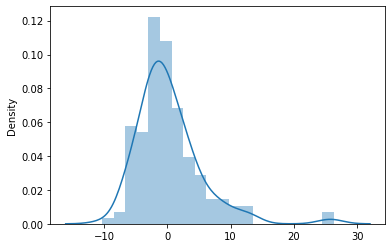

In [22]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)
# dist plots are similar to histogram on y-axis it is density and on x-axis it is error
# from below diag most of the error is neighbourhood of 0
# in few cases error is 30 and few cases error is -10

<AxesSubplot:ylabel='Density'>

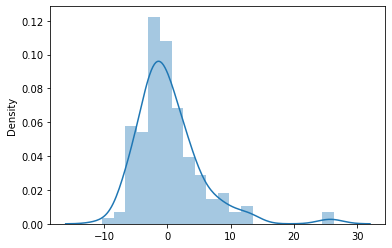

In [23]:
sns.distplot(y_test-prediction_ridge)

In [24]:
# compare to lasso ridge gives less errors
# in ridge, curve is smooth and hist is normal so performance is good in ridge for this case